In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#iterates forward a single step in time, computes interest rate
def vasicek_euler(T, N, r_0, theta, mu, sigma):
  dt = T/N
  Z = np.random.normal(0, 1)
  r_next = r_0 + theta*(mu - r_0)*dt + sigma*np.sqrt(dt)*Z
  return r_next

In [ ]:
#creates a single path of interest rates for t between 0 and T
def vasicek_path(T, N, r_0, theta, mu, sigma):
  interest_rates = [r_0]
  for i in range(N):
    interest_rates.append(vasicek_euler(T, N, interest_rates[-1], theta, mu, sigma))
  return interest_rates

In [ ]:
#runs vasicek_path functions M times
def MC_vasicek(T, N, r_0, theta, mu, sigma, num_simulations):
  all_simulations = np.zeros((num_simulations, N+1))
  for i in range(num_simulations):
    all_simulations[i, :] = vasicek_path(T, N, r_0, theta, mu, sigma)
  return all_simulations

In [ ]:
#plots the multiple paths generated from MC_vasicek
def plot_MC_vasicek(T, N, r_0, theta, mu, sigma, num_simulations):
    all_simulations = MC_vasicek(T, N, r_0, theta, mu, sigma, num_simulations)
    time_steps = np.linspace(0, T, N+1)

    plt.figure(figsize=(10, 6))

    for i in range(num_simulations):
        plt.plot(time_steps, all_simulations[i, :], alpha=0.6, linewidth=1)

    mean_path = np.mean(all_simulations, axis=0)
    plt.plot(time_steps, mean_path, color="black", linewidth=2, label="Mean Path")

    plt.xlabel("Time (Years)")
    plt.ylabel("Interest Rate")
    plt.title(f"Monte Carlo Simulation of Vasicek Model ({num_simulations} Paths)")
    plt.legend()
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.show()

In [ ]:
#make histogram of final interest rates over an array of simulations
def plot_final_distribution(simulations):
    final_rates = simulations[:, -1]
    plt.figure(figsize=(8, 5))
    plt.hist(final_rates, bins=30, density=True, alpha=0.6, color='b', edgecolor='black')
    plt.xlabel('Final Interest Rate')
    plt.ylabel('Density')
    plt.title('Distribution of Final Interest Rates')
    plt.grid(True)
    plt.show()

In [ ]:
#get key metrics from simulations (mean, variance, sd)
def analyze_MC_vasicek(MC_results):
    final_rates = MC_results[:, -1]
    mean_final = np.mean(final_rates)
    variance_final = np.var(final_rates)
    std_dev_final = np.std(final_rates)
    return {
        "Mean Final Rate": mean_final,
        "Variance": variance_final,
        "Standard Deviation": std_dev_final
    }

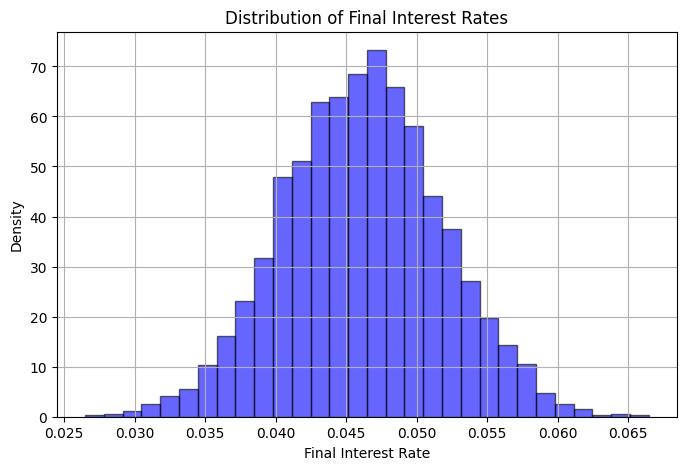

In [ ]:
all_simulations = MC_vasicek(1, 365, 0.05, 0.2475, 0.0325, 0.0064, 10000)

analyze_MC_vasicek(all_simulations)
plot_final_distribution(all_simulations)